<span style="font-family: Arial; color:green; font-size:1.6em; font-weight:bold" >__Decision Threshold In Machine Learning__</span>

Tutorial for improve skills: 'Decision Threshold In Machine Learning' (from GeeksforGeeks) by Marcus Mariano

**For more information about Marcus Mariano: [Web site](https://marcusmariano.github.io/mmariano/)**  

**Decision Threshold In Machine Learning: [GeeksforGeeks](https://www.geeksforgeeks.org/decision-threshold-in-machine-learning/)**


## Import Packages

In [1]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", color_codes=True)
%matplotlib inline

## Set parameters

In [2]:
N_THREADS = 6 # threads cnt for lgbm and linear models
N_FOLDS = 5 # folds cnt for AutoML
N_JOBS = -1
SEED = 0 # fixed random state for various reasons
TEST_SIZE = 0.3 # Test size for metric check
VERBOSE = 1
TIMEOUT = 600 # Time in seconds for automl run, 600 seconds = 10 minutes
RAM = 7 #  Number of RAM limit
CPU_LIMIT = 4 # Number of CPU limit
TARGET_NAME = 'y'

## Load Datasets

In [3]:
# Import required modules.
from sklearn import datasets
  
# Get the data.

 
# Get the names of the features.
cols_names = data_set.feature_names
  
# Convert the data into pandas data frame.
data = pd.DataFrame(data_set.data, columns = cols_names)
 
data[TARGET_NAME] = data_set.target  # Input target variable y.
    
# Data Frame.
print(data.shape)
data.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Exploratory Data Analysis (EDA)


In [4]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
y                          0
dtype: int64

In [7]:
data[TARGET_NAME].value_counts()

1    357
0    212
Name: y, dtype: int64

## Plot

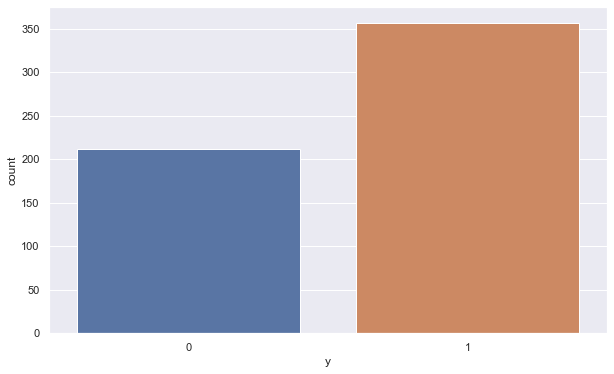

In [5]:
fig = plt.subplots(figsize=(10, 6))
sns.countplot(x=TARGET_NAME, data=data);

# Data Engineering

## Immutable data

In [8]:
train = data.copy()

#  Set to training model

## Create X, y variables

In [9]:
# Choosing Predictors: X and Class: y
# X = train.iloc[:, :-1]
# y = train.iloc[:, 69]

X = train.drop(TARGET_NAME, axis=1)
y = train[TARGET_NAME]

print(X.shape, y.shape)

(569, 30) (569,)


In [10]:
print(f"Count 0: {list(y).count(0)}")
print(f"Count 1: {list(y).count(1)}")

print(f"\nPercent of 1: {list(y).count(1)  / (list(y).count(0) + list(y).count(1))}")

Count 0: 212
Count 1: 357

Percent of 1: 0.6274165202108963


## Division of training and validation databases

In [11]:
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                      y, 
                                                      test_size=TEST_SIZE, 
                                                      random_state=SEED) 


print(f"Train 70%, Valid 30% data: {X_train.shape, X_valid.shape}",\
                                    y_train.shape, y_valid.shape)

Train 70%, Valid 30% data: ((398, 30), (171, 30)) (398,) (171,)


# SVC Model

In [12]:
# Import required modules.
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, recall_score, 
                             precision_score, accuracy_score)
  
# Create Classifier Object.
svc = SVC()
svc.fit(X_train, y_train)
  
# Use decision_function method.
decision_function = svc.decision_function(X_valid)
decision_function[:10]

array([0.28586342, 1.1583131 , 1.03784253, 0.49816645, 1.44837838,
       1.41590975, 1.49228033, 1.45680078, 1.37848076, 1.55150973])

## Actual Scores obtained:

In [13]:
# Actual obtained results without any manual setting of Decision Threshold.
preds_actual = svc.predict(X_valid)       # Predict using classifier.
accuracy_actual = svc.score(X_valid, y_valid)
classification_report_actual = classification_report(y_valid, preds_actual)

print(preds_actual, "\n", accuracy_actual, 
      "\n", classification_report_actual, '\n')

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1] 
 0.9239766081871345 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89        63
           1       0.90      0.99      0.94       108

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.91       171
weighted avg       0.93      0.92      0.92       171
 



Text(0.5, 1.0, 'Precision-Recall Curve')

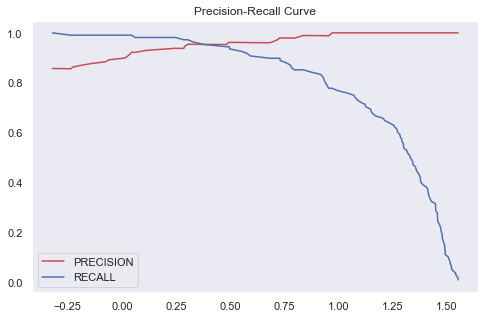

In [14]:
# Plot Precision-Recall curve using sklearn.
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_valid, decision_function)
  
# Plot the output.
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], c ='r', label ='PRECISION')
plt.plot(thresholds, recall[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')

## Intercession threshold for Precision and Recall

In [23]:
set(precision) & set(recall)

{0.9537037037037037, 1.0}

In [24]:
same_pr = 0.9537037037037037

print(f'Intercession  for Precision and Recall: {same_pr}')
print(f'Precision index: {list(precision).index(same_pr)}')
print(f'Recall index: {list(recall).index(same_pr)}')

thres_pr = thresholds[18]
print(f'Intercession threshold: {thresholds[18]}')

Intercession  for Precision and Recall: 0.9537037037037037
Precision index: 18
Recall index: 18
Intercession threshold: 0.5295436982768041


## List of Threshold close to intercession

In [25]:
thres_list = []

for elem in thresholds:
    if 0.4 <= elem <= 0.7:
        thres_list.append(elem)

thres_list

[0.43326236840871934,
 0.46176279654643954,
 0.4644272474908501,
 0.47602988949317565,
 0.5,
 0.5295436982768041,
 0.6075425049629221,
 0.6177492764267867,
 0.6197864905956196,
 0.6559172516255781,
 0.6738295946363356,
 0.6820597030000143]

## SVC decision_function

In [27]:
# Implementing main logic.
  
# Based on analysis of the Precision-Recall curve.
# Let Decision Threshold value be around 0.6... 
# to get high Precision without affecting recall much.
# Desired results.
  
# Decision Function output for x_test.
d_func = svc.decision_function(X_valid)
  
d_func[:10]



array([0.28586342, 1.1583131 , 1.03784253, 0.49816645, 1.44837838,
       1.41590975, 1.49228033, 1.45680078, 1.37848076, 1.55150973])

So we need to choose that value of __Decision Threshold__ which would __increase Precision but not much decrease in Recall__. One such value form the above plot is around 0.6 Decision Threshold.

In [28]:
# Set the value of decision threshold.
# decision_teshold = 0.5914643767268305
decision_teshold = 0.579882727667065
# decision_teshold = 0.59249372
# decision_teshold = thres_pr
# decision_teshold = same_pr
# decision_teshold = thres_f1
  
# Desired prediction to increase precision value.
preds_desired =[]
  
# Iterate through each value of decision function output
# and if  decision score is > than Decision threshold then,
# append (1) to the empty list ( desired_prediction) else
# append (0).
for i in d_func:
    if i < decision_teshold:
        preds_desired.append(0)
    else:
        preds_desired.append(1)



print(f"Count 0: {list(preds_desired).count(0)}")
print(f"Count 1: {list(preds_desired).count(1)}")

print(f"\nPercent of 1: {list(preds_desired).count(1)  / (list(preds_desired).count(0) + list(preds_desired).count(1))}")
      
preds_desired[:10]

Count 0: 68
Count 1: 103

Percent of 1: 0.6023391812865497


[0, 1, 1, 0, 1, 1, 1, 1, 1, 1]

## Comparison between old and new Precision Values.

In [29]:

# Comparison
  
# Old Precision Value
print("old precision value:", precision_score(y_valid, preds_actual))
# New precision Value  
print("new precision value:", precision_score(y_valid, preds_desired))

old precision value: 0.8991596638655462
new precision value: 0.9611650485436893


    decision_teshold = 0.59249372
    Count 0: 69
    Count 1: 102
    Percent of 1: 0.5964912280701754
    new precision value: 0.9607843137254902

    decision_teshold = 0.5914643767268305
    new precision value: 0.9607843137254902
    
    decision_teshold = 0.95480609
    Count 0: 86
    Count 1: 85
    Percent of 1: 0.49707602339181284
    new precision value: 0.9882352941176471

# Threshold for F1-Score


In [16]:
from sklearn.metrics import f1_score

# predict labels
preds_svc = svc.predict(X_valid)

# evaluate the model
f1_sc = f1_score(y_valid, preds_svc)
print(f'F1-Score: {f1_sc:.5f}')

F1-Score: 0.94273


In [17]:
f1 = (2*recall*precision) / (recall+precision)

print(f"F1 Scores: {f1[:5]}")

thres_f1 = thresholds[np.argmax(f1)]

print(f'Best threshold: {thres_f1}')
print(f'Best F1-Score: {np.max(f1)}')

F1 Scores: [0.92307692 0.91845494 0.92241379 0.92640693 0.93043478]
Best threshold: 0.3050484262296397
Best F1-Score: 0.963302752293578


## Optimal Threshold Tuning for F1-Score SVC

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
        return (pos_probs >= threshold).astype('int')

# Create Classifier Object.
svc = SVC(probability=True)
svc.fit(X_train, y_train)

# predict probabilities
probs_svc = svc.predict_proba(X_valid)
# keep probabilities for the positive outcome only

# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_valid, probs_svc[:, 1])

no_skill = len(y_valid[y_valid==1]) / len(y_valid)


# define thresholds
thres_range = np.arange(0, 1, 0.001)
print(f"Len of Range Thresholds: {len(thres_range)}")

# evaluate each threshold
scores = [f1_score(y_valid, to_labels(probs_svc[:, 1], t)) for t in thres_range]

# get best threshold
ix = np.argmax(scores)

print(f'Best Threshold: {thres_range[ix]:.5f}, F1-Score: {scores[ix]:.5f}')

Len of Range Thresholds: 1000
Best Threshold: 0.46500, F1-Score: 0.96330


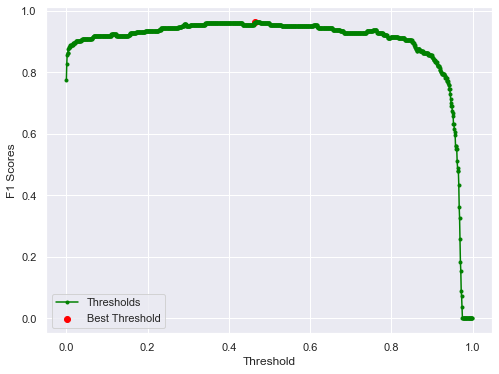

In [22]:
# plot the roc curve for the model
plt.figure(figsize=(8, 6))
plt.plot(thres_range, scores, marker='.', color='green', label='Thresholds')
plt.scatter(thres_range[ix], scores[ix], marker='o', color='red', label='Best Threshold')
# axis labels
plt.ylabel('F1 Scores')
plt.xlabel('Threshold')
plt.legend()
# show the plot
plt;

In [159]:
thres_tutorial = 0.5914643767268305

thres_tutorial in thresholds

False

# RandomForestClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc = RandomForestClassifier(n_estimators=1000, 
                             max_leaf_nodes=500, 
#                              max_leaf_nodes=None, 
                             n_jobs=N_JOBS)

rfc.fit(X_train, y_train)

preds_rfc = rfc.predict(X_valid)
preds_rfc[:5]

# predict labels
preds_svc = svc.predict(X_valid)

# evaluate the model
f1_rfc = f1_score(y_valid, preds_rfc)
print(f'F1-Score RandomForest: {f1_rfc:.5f}')

F1-Score RandomForest: 0.96744


## Optimal Threshold Tuning for F1-Score RandomForest


In [63]:
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
        return (pos_probs >= threshold).astype('int')

rfc = RandomForestClassifier(
#                              n_estimators=1000, 
#                              max_leaf_nodes=500, 
#                              max_leaf_nodes=None, 
                             n_jobs=N_JOBS)

rfc.fit(X_train, y_train)

# predict labels
probs_rfc = rfc.predict_proba(X_valid)

# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_valid, probs_rfc[:, 1])

no_skill = len(y_valid[y_valid==1]) / len(y_valid)


# define thresholds
thres_range = np.arange(0, 1, 0.001)
print(f"Len of Range Thresholds: {len(thres_range)}")

# evaluate each threshold
scores = [f1_score(y_valid, to_labels(probs_rfc[:, 1], t)) for t in thres_range]

# get best threshold
ix = np.argmax(scores)

print(f'Best Threshold: {thres_range[ix]:.5f}, F1-Score: {scores[ix]:.5f}')

Len of Range Thresholds: 1000
Best Threshold: 0.45100, F1-Score: 0.98605


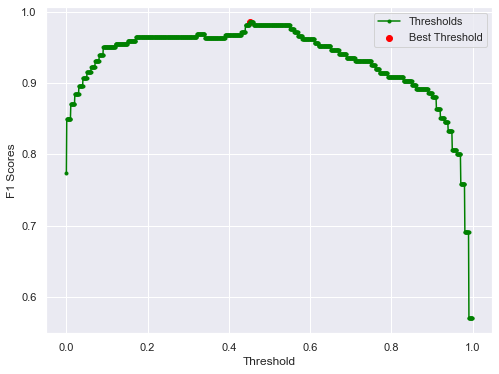

In [64]:
# plot the roc curve for the model
plt.figure(figsize=(8, 6))
plt.plot(thres_range, scores, marker='.', color='green', label='Thresholds')
plt.scatter(thres_range[ix], scores[ix], marker='o', color='red', label='Best Threshold')
# axis labels
plt.ylabel('F1 Scores')
plt.xlabel('Threshold')
plt.legend()
# show the plot
plt;

## Comparison between old and new F1-Scores Values.

In [58]:
# probs_rfc
thres_range[ix]

0.425

In [70]:
# Threshold Good
threshold = thres_range[ix]
print(threshold)
preds_rfc_ = [1 if x >= threshold else 0 for x in probs_rfc[:, 1]]
preds_rfc_[:20]

0.451


[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0]

In [68]:
rfc = RandomForestClassifier(n_jobs=N_JOBS)

rfc.fit(X_train, y_train)
# predict labels
preds_rfc = rfc.predict(X_valid)

# Comparison
  
# Old Precision Value
print("Old F1 Scores value:", f1_score(y_valid, preds_rfc))
# New precision Value  
print("New F1 Scores value:", f1_score(y_valid, preds_rfc_))

Old F1 Scores value: 0.9674418604651163
New F1 Scores value: 0.986046511627907
